In [1]:
#importing the relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline

In [3]:
#importing the database
data = pd.read_csv("RNA_Database_updated.csv")
data.head(10)

,Number_of_Motifs,Geometry
0,1,28.57
1,5,0.00
2,10,1.85
3,1,19.15
4,639,19.15
5,2,8.57
6,1,0.00
7,572,29.45
8,1,11.11
9,1,22.22


In [4]:
data.shape

(4645, 2)

In [5]:
data.dtypes

Number_of_Motifs      int64
Geometry            float64
dtype: object

In [6]:
data.isnull().sum()

Number_of_Motifs    0
Geometry            0
dtype: int64

In [7]:
data.columns

Index(['Number_of_Motifs', 'Geometry'], dtype='object')

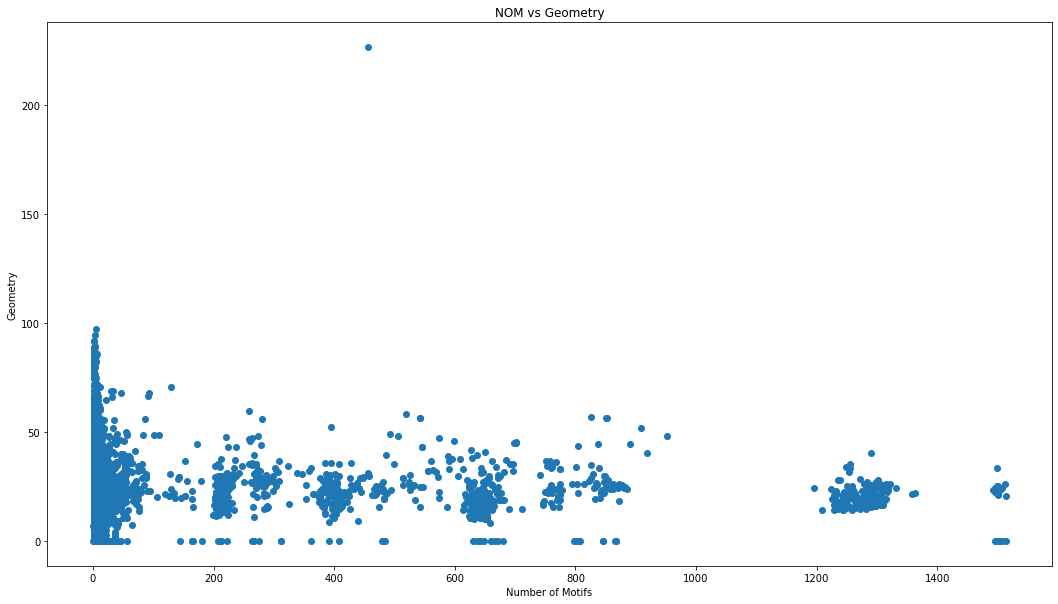

In [10]:
#plt.figure(figsize=(7,7))
# plt.scatter(data["Number_of_Motifs"],data["Clashes"])
# plt.xlabel("Number of Motifs")
# plt.ylabel("Clashes")
# plt.title("NOM vs Clashes")
# plt.show()

plt.figure(figsize=(18,10))
plt.scatter(data["Number_of_Motifs"],data["Geometry"])
plt.xlabel("Number of Motifs")
plt.ylabel("Geometry")
plt.title("NOM vs Geometry")
plt.show()

# #plt.figure(figsize=(7,7))
# plt.scatter(data["Number_of_Motifs"],data["Density"])
# plt.xlabel("Number of Motifs")
# plt.ylabel("E-density")
# plt.title("NOM vs E-density")
# plt.show()

# #plt.figure(figsize=(7,7))
# plt.scatter(data["Clashes"],data["Geometry"])
# plt.xlabel("Clashes")
# plt.ylabel("Geometry")
# plt.title("Clashes vs Geometry")
# plt.show()

# #plt.figure(figsize=(7,7))
# plt.scatter(data["Clashes"],data["Density"])
# plt.xlabel("Clashes")
# plt.ylabel("E-density")
# plt.title("Clashes vs E-density")
# plt.show()

# #plt.figure(figsize=(7,7))
# plt.scatter(data["Geometry"],data["Density"])
# plt.xlabel("Geometry")
# plt.ylabel("E-density")
# plt.title("Geoetry vs E-density")
# plt.show()

In [17]:
km = KMeans(n_clusters = 8)
xfeatures = data[['Number_of_Motifs','Geometry']]
clusters = km.fit_predict(xfeatures)

In [18]:
km.labels_

array([1, 1, 1, ..., 7, 1, 1], dtype=int32)

In [19]:
clusters

array([1, 1, 1, ..., 7, 1, 1], dtype=int32)

In [20]:
clusters in km.labels_

True

In [21]:
km.cluster_centers_

array([[ 819.46153846,   25.16835165],
       [   8.10406616,   11.45983115],
       [1501.39285714,   17.05535714],
       [ 415.78443114,   23.77713174],
       [ 637.15811966,   19.85196581],
       [1271.95882353,   20.10552941],
       [ 224.88122605,   22.70570881],
       [   9.18308081,   48.51758838]])

In [22]:
data['groups'] = clusters
data.head(20)

,Number_of_Motifs,Geometry,groups
0,1,28.57,1
1,5,0.00,1
2,10,1.85,1
3,1,19.15,1
4,639,19.15,4
5,2,8.57,1
6,1,0.00,1
7,572,29.45,4
8,1,11.11,1
9,1,22.22,1


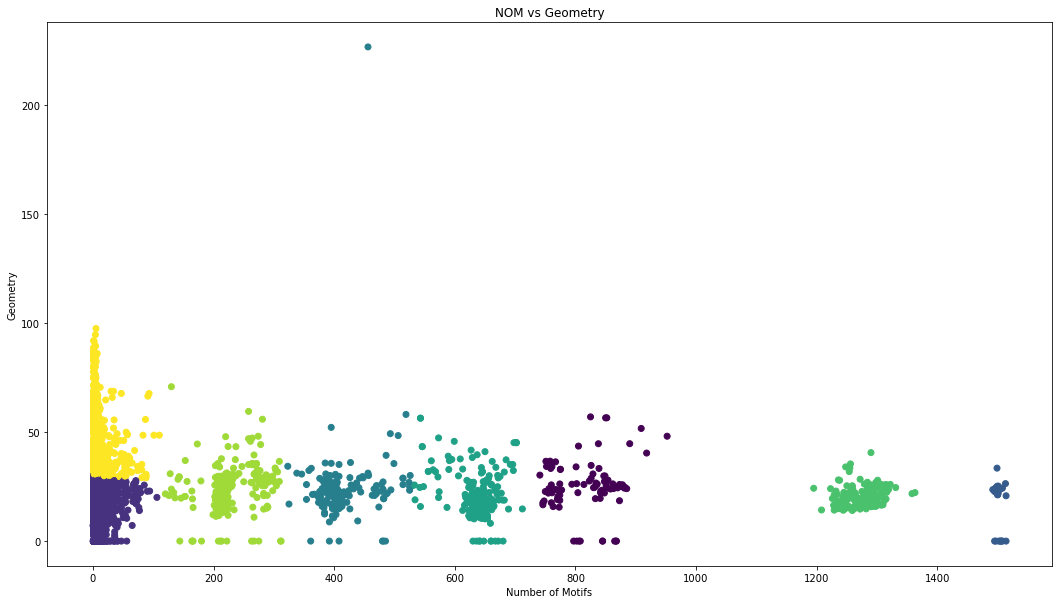

In [23]:
#plt.figure(figsize=(20,10))
# plt.scatter(data['Number_of_Motifs'],data['Clashes'],c=data['groups'])
# plt.xlabel("Number of Motifs")
# plt.ylabel("Clashes")
# plt.title("NOM vs Clashes")
# plt.show()

plt.figure(figsize=(18,10))
plt.scatter(data['Number_of_Motifs'],data['Geometry'],c=data['groups'])
plt.xlabel("Number of Motifs")
plt.ylabel("Geometry")
plt.title("NOM vs Geometry")
plt.show()

# plt.scatter(data['Number_of_Motifs'],data['Density'],c=data['groups'])
# plt.xlabel("Number of Motifs")
# plt.ylabel("E-density")
# plt.title("NOM vs E-density")
# plt.show()

# plt.scatter(data['Clashes'],data['Geometry'],c=data['groups'])
# plt.xlabel("Clashes")
# plt.ylabel("Geometry")
# plt.title("Clashes vs Geometry")
# plt.show()

# plt.scatter(data['Clashes'],data['Density'],c=data['groups'])
# plt.xlabel("Clashes")
# plt.ylabel("E-density")
# plt.title("Clashes vs E-density")
# plt.show()

# plt.scatter(data['Geometry'],data['Density'],c=data['groups'])
# plt.xlabel("Geometry")
# plt.ylabel("E-density")
# plt.title("Geometry vs E-density")
# plt.show()

In [24]:
cluster_dict = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8}

In [25]:
#printing out the 1st cluster
#data[data['groups']==0]

In [26]:
#printing out second cluster
#data[data['groups']==1]

In [27]:
#printing out third cluster
#data[data['groups']==2]

In [28]:
#printing out fourth cluster
#data[data['groups']==3]

In [29]:
#printing out fifth cluster
#data[data['groups']==4]

In [30]:
#printing out sixth cluster
#data[data['groups']==5]

In [31]:
#printing out seventh cluster
#data[data['groups']==6]

In [32]:
#printing out eigth cluster
#data[data['groups']==7]

In [33]:
#printing out ninth cluster
#data[data['groups']==8]

In [34]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(xfeatures)
x_scaled

array([[-0.44003438,  0.49346533],
       [-0.42718361, -1.1316279 ],
       [-0.41112015, -1.02639785],
       ...,
       [-0.41433284,  1.63734439],
       [-0.41433284, -0.00879485],
       [-0.44324707, -1.1316279 ]])

In [40]:
X = xfeatures
X

,Number_of_Motifs,Geometry
0,1,28.57
1,5,0.00
2,10,1.85
3,1,19.15
4,639,19.15
...,...,...
4640,9,22.37
4641,9,38.16
4642,9,48.68
4643,9,19.74


In [41]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 8)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 207.33745240895124
2 : 82.96533220901604
3 : 46.555967656825565
4 : 30.562155792925715
5 : 25.54053617198982
6 : 22.158762079082024
7 : 20.617066563302


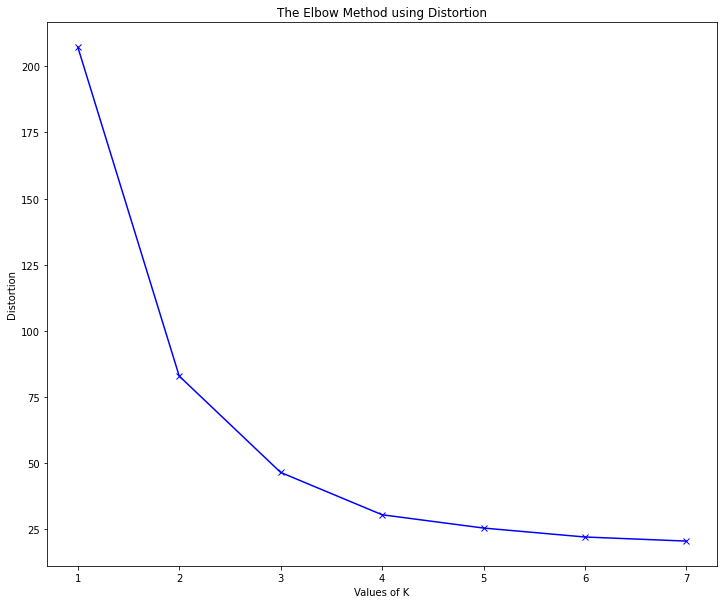

In [42]:
plt.figure(figsize=(12,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [43]:
km2 = KMeans(n_clusters = 3)
new_clusters = km2.fit_predict(x_scaled)
data_scaled = data
data_scaled['cluster'] = new_clusters
data_scaled

,Number_of_Motifs,Geometry,groups,cluster
0,1,28.57,1,1
1,5,0.00,1,2
2,10,1.85,1,2
3,1,19.15,1,2
4,639,19.15,4,0
...,...,...,...,...
4640,9,22.37,1,2
4641,9,38.16,7,1
4642,9,48.68,7,1
4643,9,19.74,1,2


In [44]:
#listing out the updated 1st cluster
#data[data['cluster']==0]

In [45]:
#listing out the updated 2nd cluster
#data[data['cluster']==1]

In [46]:
#listing out the updated 3rd cluster
#data[data['cluster']==2]

In [47]:
#listing out the updated 4th cluster
#data[data['cluster']==3]

In [48]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
# from sklearn.decomposition import PCA
# reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
# results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
# plt.title('K-means Clustering with 2 dimensions')
# plt.show()

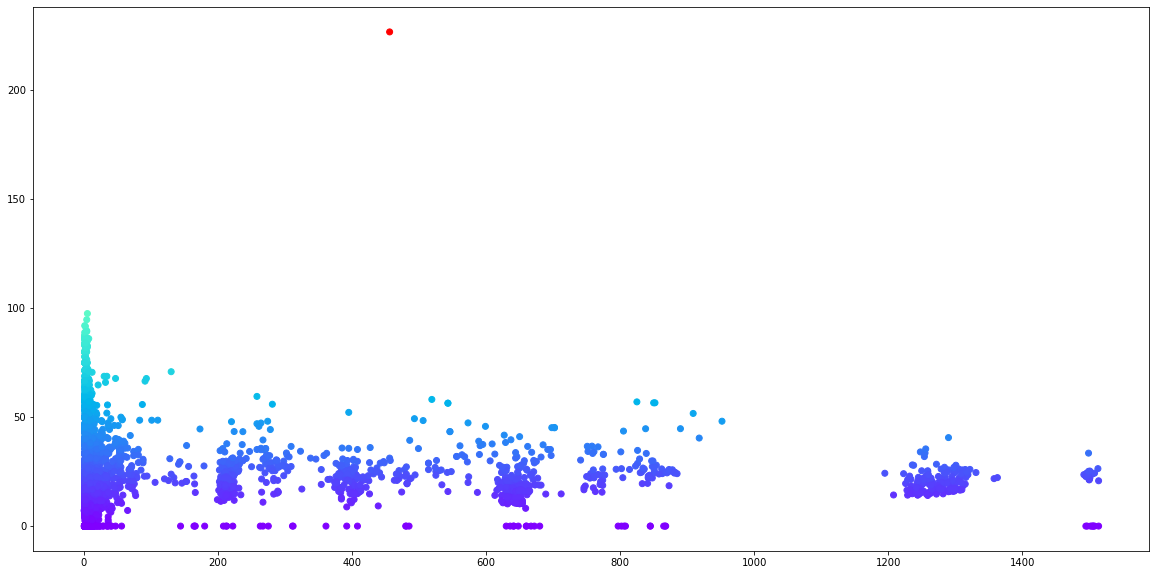

In [50]:
# Plot of our clusters
plt.figure(figsize=(20,10))
plt.scatter(data['Number_of_Motifs'],data['Geometry'],c=data['Geometry'],cmap='rainbow')
plt.show()

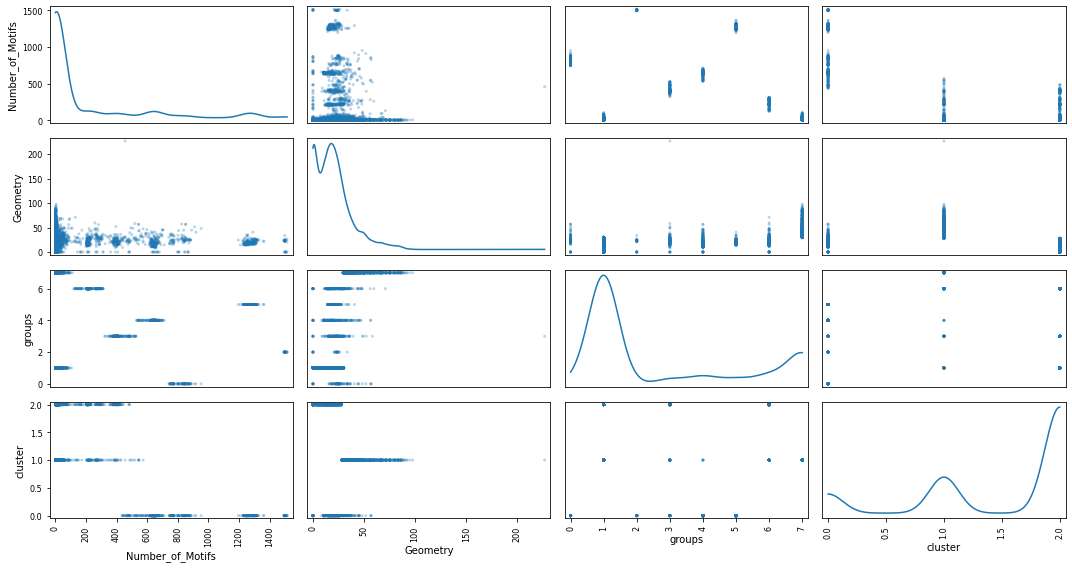

In [51]:
pd.plotting.scatter_matrix(data, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout() # To avoid overlapping of plots
plt.savefig("Scatter matrix for RNA Bricks2.png")